In [1]:
import matplotlib
import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn


plt.rcParams['figure.figsize'] = (6.0, 6.0)
np.random.seed(42)

from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from matplotlib import rc
rc('animation', html='jshtml')
font = {'size'   : 22}

matplotlib.rc('font', **font)

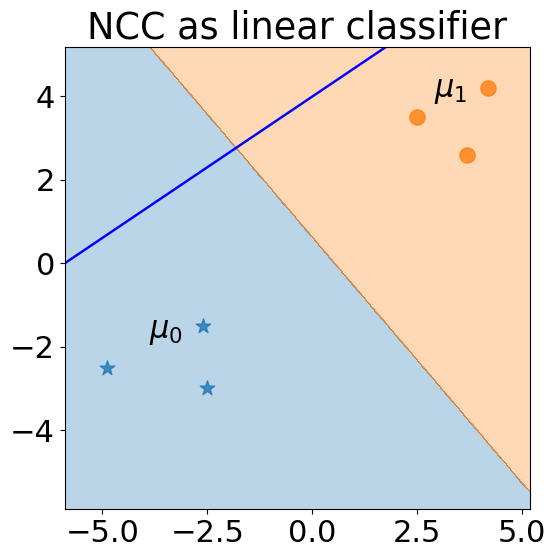

In [11]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestCentroid


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('*', 'o', 'x', '^', 'v')
    colors = ('C0', 'C1', 'C2', 'C3', 'C4')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xmin = min([x1_min, x2_min])
    xmax = max([x1_max, x2_max])
    xx1, xx2 = np.meshgrid(np.arange(xmin, xmax, resolution),
                           np.arange(xmin, xmax, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    scale_x = (xx1.max() - xx1.min())/20.
    scale_y = (xx2.max() - xx2.min())/20.

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    s=120, 
                    label=cl)
                    #edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    #edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=200, 
                    label='test set')
    mus = []
    for idx, cl in enumerate(np.unique(y)):
        mus.append([X[y == cl, 0].mean(),
                 X[y == cl, 1].mean()])
        plt.text(X[y == cl, 0].mean() - scale_x,
                 X[y == cl, 1].mean() + scale_y,
                s='$\mu_{' + str(int(cl)) + '}$',
                )
    mus_x = list(map(lambda x: x[0], mus))
    mus_y = list(map(lambda x: x[1], mus))
    x_min, y_min, x_max, y_max = mus_x[0], mus_y[0], mus_x[1]-mus_x[0], mus_y[1]-mus_y[0]
    scaler = np.array([[np.linalg.norm(x_max-x_min), 0],
                       [0, np.linalg.norm(y_max-y_min)]])
    fmin = 1.0 * scaler @ np.array([x_min, y_min])
    fmax = 1.0 * scaler @ np.array([x_max, y_max])
    plt.arrow(fmin[0], fmin[1], fmax[0], fmax[1],width=0.025,head_width=0.2, color='blue')
    x_h = x_min + (x_max)/2
    y_h = y_min + (y_max)/2
    rad_90 = np.deg2rad(90)
    new_mus = (
        np.array([[x_min, y_min], [x_max, y_max]])
        @ np.array([[np.cos(rad_90), -np.sin(rad_90)], [np.sin(rad_90), np.cos(rad_90)]])
    )# @ (1.25 * np.eye(2))
    dir = (new_mus[0,:] - new_mus[1,:])/np.linalg.norm(new_mus[0,:] - new_mus[1,:])
    #plt.arrow(new_mus[0][0], new_mus[0][1], new_mus[1][0], new_mus[1][1],width=0.025,head_width=0., color='green')
    #plt.text(mus_x[1]+mus_x[0]+0.5, mus_y[1]+mus_y[0]+0.5, s='$\\omega$', color='blue')
    #plt.text(mus_x[1]+mus_x[0]+1.5, mus_y[1]+mus_y[0]-2.5, s='$\\beta$', color='green')
    return mus


x = np.array([0.6, 2.9, 3]) - 5.5
x2 = np.array([8, 9.2, 9.7]) - 5.5
y = np.array([1.5, 2.5, 1]) - 4
y2 = np.array([7.5, 6.6, 8.2]) - 4
x3 = np.array([7.5])
y3 = np.array([4.0])

mu1x = x.mean()
mu1y = y.mean()

mu2x = x2.mean()
mu2y = y2.mean()

clf = NearestCentroid()
X = np.concatenate([x, x2])
Y = np.concatenate([y, y2])
X = np.c_[X, Y]
Y = [0,0,0,1,1,1]
clf.fit(X, Y)

mus = plot_decision_regions(X, Y, clf)
mus_x = list(map(lambda x: x[0], mus))
mus_y = list(map(lambda x: x[1], mus))
#plt.arrow(mus_x[0], mus_y[0], mus_x[1], mus_y[1],width=0.025,head_width=0.2, color='blue')
plt.title("NCC as linear classifier")
plt.savefig('../src/images/Perceptron___FOO.svg', transparent=True)
plt.show()